In [1]:
%pylab inline
import cmath

Populating the interactive namespace from numpy and matplotlib


In [105]:
angle0 = radians(55.0) #incident angle
n0 = 1.0+0.0j    #ambient index of refraction
nS = 1.731+0.0j  #substrate index of refraction
#nF = 1.81659+0.000275j #film index of refraction
nF = 1.821766+.137229j
dF = 100 #nm only appears in ratio with wL
wL = 900.9 #nm only appears in ratio with dF

In [106]:
#Psi and Delta from CompleteEASE modelling for comparison (at this wL and thickness)
PsiCE=11.996151
DeltaCE=168.020844
RhoCE = tan(radians(PsiCE))*exp(complex(0,radians(DeltaCE))) #Calculate from Psi and Delta, can replace with direct values if wanted

In [108]:
###Calculate Psi and Delta from n,k,thickness (one set of values)

angleF = arcsin(n0/nF*sin(angle0))
angleS = arcsin(n0/nS*sin(angle0))

#Fresnel coefficients at ambient/film
rp1=(nF*cos(angle0)-n0*cos(angleF))/(nF*cos(angle0)+n0*cos(angleF))
rs1=(n0*cos(angle0)-nF*cos(angleF))/(n0*cos(angle0)+nF*cos(angleF))
#Fresnel coefficients at film/substrate
rp2=(nS*cos(angleF)-nF*cos(angleS))/(nS*cos(angleF)+nF*cos(angleS))
rs2=(nF*cos(angleF)-nS*cos(angleS))/(nF*cos(angleF)+nS*cos(angleS))
#Complex reflection for 1 film on substrate (Eqn. 3.17 in Handbook)
b = 2.0*pi*dF/wL*nF*cos(angleF)
rpp = (rp1+rp2*exp((0.0-2.0j)*b))/(1+rp1*rp2*exp((0.0-2.0j)*b))
rss = (rs1+rs2*exp((0.0-2.0j)*b))/(1+rs1*rs2*exp((0.0-2.0j)*b))

#calculate tan(Psi)e^(iDelta)=rho=rp/rs
rho = rpp/rss

#calculate Psi and Delta from amplitude and phase of rho
tanPsi = (real(rho)**2+imag(rho)**2)**(1/2)
Psi = degrees(arctan(tanPsi))
Delta = degrees(arctan(imag(rho)/real(rho)))
#print(degrees(cmath.phase(rho)))

print("rho:", rho)
print("Psi:",Psi)
print("Delta:",Delta)
print("Deltas w/ same tan:", Delta+180, Delta-180)

print()
print("DATA FROM ELLIPSOMETER:")
print("rho:", RhoCE)
print("Psi:",PsiCE)
print("Delta:", DeltaCE)


rho: (-0.163847434914-0.112507782206j)
Psi: 11.2413864555
Delta: 34.475900677
Deltas w/ same tan: 214.475900677 -145.524099323

DATA FROM ELLIPSOMETER:
rho: (-0.207859071474+0.0441027808031j)
Psi: 11.996151
Delta: 168.020844


In [109]:
#Setup for next calcs at a range of n and k
nSet = zeros((30,1))
kSet = zeros((41,1))
for n in range(30):
    nSet[n]=1.0+0.05*n
for k in range(41):
    kSet[k]=10**((-1*k/10))
PsiSet = zeros((30,41))
DeltaSet = zeros((30,41))
Errors=zeros((30,41))

In [110]:
#Calculate Psi and Delta for a range of n and k
angleS = arcsin(n0/nS*sin(angle0))
for n in range(30):
    for k in range(41):
        
        nF=nSet[n]+kSet[k]*(0.0+1j) #overwrite nF
        angleF = arcsin(n0/nF*sin(angle0)) #recalculate angleF, angleS is unchanged
        
        #Fresnel coefficients at ambient/film
        rp1=(nF*cos(angle0)-n0*cos(angleF))/(nF*cos(angle0)+n0*cos(angleF))
        rs1=(n0*cos(angle0)-nF*cos(angleF))/(n0*cos(angle0)+nF*cos(angleF))
        #Fresnel coefficients at film/substrate
        rp2=(nS*cos(angleF)-nF*cos(angleS))/(nS*cos(angleF)+nF*cos(angleS))
        rs2=(nF*cos(angleF)-nS*cos(angleS))/(nF*cos(angleF)+nS*cos(angleS))
        #Complex reflection for 1 film on substrate (Eqn. 3.17 in Handbook)
        b = 2.0*pi*dF/wL*nF*cos(angleF)
        rpp = (rp1+rp2*exp((0.0-2.0j)*b))/(1+rp1*rp2*exp((0.0-2.0j)*b))
        rss = (rs1+rs2*exp((0.0-2.0j)*b))/(1+rs1*rs2*exp((0.0-2.0j)*b))

        #calculate tan(Psi)e^(iDelta)=rho=rp/rs
        rho = rpp/rss

        #calculate Psi and Delta from amplitude and phase of rho
        tanPsi = (real(rho)**2+imag(rho)**2)**(1/2)
        PsiSet[n,k] = degrees(arctan(tanPsi))
        ds = degrees(cmath.phase(rpp)-cmath.phase(rss))
        if ds<-90:
            ds = ds+360
            
        elif ds>270:
            ds = ds-360
        #degrees(arctan(imag(rho)/real(rho)))
        
        DeltaSet[n,k] = ds#degrees(arctan(imag(rho)/real(rho)))
        #print(degrees(cmath.phase(rpp)-cmath.phase(rss)),degrees(cmath.phase(rho)),ds)

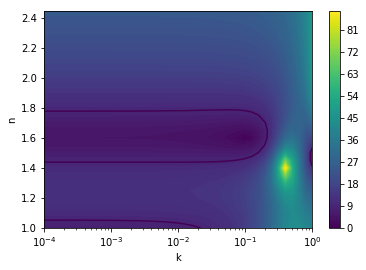

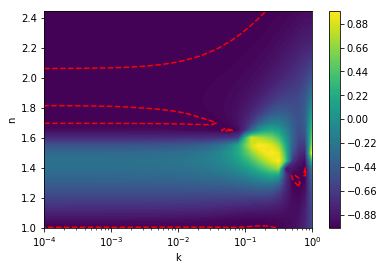

In [111]:
#Plotting Psi and Delta as a function of n and k

#Experimental Values to draw contours of on plot
#Delta contours may also appear where Delta is discontinuous 
PsiExp=9.066310 #if PsiExp == 0, will not plot these lines
DeltaExp=173.554306
EquivDeltaExp1 = DeltaExp+180
EquivDeltaExp2 = DeltaExp-180

#Plotting Psi
if PsiExp != 0:
    contour(kSet[:,0],nSet[:,0],PsiSet,[PsiExp])

contourf(kSet[:,0],nSet[:,0],PsiSet,100)

colorbar()
xlabel('k')
ylabel('n')
xscale('log')
plt.show()

#Plotting Delta - cos(Delta) graphed to avoid discontinuities
if PsiExp != 0:
    #contour(kSet[:,0],nSet[:,0],DeltaSet,[DeltaExp]) #Delta
    contour(kSet[:,0],nSet[:,0],cos(radians(DeltaSet)),[cos(radians(DeltaExp))],colors='red') #cos(Delta)
    
#contourf(kSet[:,0],nSet[:,0],DeltaSet,100) #Delta
contourf(kSet[:,0],nSet[:,0],cos(radians(DeltaSet)),100) #cos(Delta)

colorbar()
xlabel('k')
ylabel('n')
xscale('log')
plt.show()


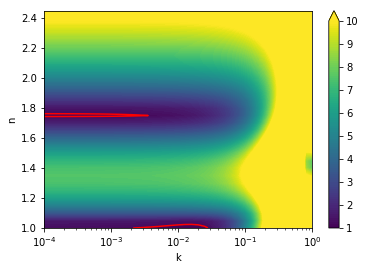

In [113]:
#Calculate and Plot Errors to the Experimental Psi and Delta at varying n, k
#Using MSE from CompleteEASE Manual Eqn 2.2 (scaled)
#or Using similar formula with tan(Psi) and cos(Delta) as fit paramters

maxMSEallow=1.2 #level at which to draw contour line (minMSE=1)
scale = 10 #maximum value on color scale

psiE=radians(PsiExp)
delE=radians(DeltaExp)
for n in range(30):
    for k in range(41):
        psiG=radians(PsiSet[n,k])
        delG=radians(DeltaSet[n,k])
        NE=cos(2*psiE)
        NG=cos(2*psiG)
        CE=sin(2*psiE)*cos(delE)
        CG=sin(2*psiG)*cos(delG)
        SE=sin(2*psiE)*sin(delE)
        SG=sin(2*psiG)*sin(delG)
        Errors[n,k] = sqrt(((NE-NG)/.01)**2+((CE-CG)/.01)**2+((SE-SG)/.01)**2) #Eqn 2.2 (N,C,S)
        #Errors[n,k] = sqrt((cos(delE)-cos(delG))**2+(tan(psiE)-tan(psiG))**2) #tan(Psi) and cos(Delta)
        
#find minMSE for Scaling        
col = argmin(Errors)%41
rw = int((argmin(Errors)-col)/41)
minMSE=(Errors[rw,col])

#Scale Error data
for n in range(30):
    for k in range(41):
        Errors[n,k]=Errors[n,k]/minMSE
        
#plotting
contour(kSet[:,0],nSet[:,0],Errors,[maxMSEallow],colors='red')
contourf(kSet[:,0],nSet[:,0],Errors,np.linspace(1,scale,100),extend='max',vmin=1,vmax=scale)
#clim(1,10)
colorbar(ticks=np.linspace(1,scale,10))
xlabel('k')
ylabel('n')
xscale('log')

In [ ]:
#